In [2]:
### in R code i need to get the data, cause python doesn't recognised it as a tabel on the site himself
###  So i scrape it from the API with R and save it so i can retrieve it with python code and continue with python

install.packages("cbsodataR")
library(cbsodataR)

data = cbs_get_data("84583NED")
head(data)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,⋯,AfstandTotKinderdagverblijf_97,AfstandTotSchool_98,ScholenBinnen3Km_99,OppervlakteTotaal_100,OppervlakteLand_101,OppervlakteWater_102,MeestVoorkomendePostcode_103,Dekkingspercentage_104,MateVanStedelijkheid_105,Omgevingsadressendichtheid_106
,<chr>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<lgl>,<lgl>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>
1,NL00,Nederland,Land,NL00,.,17282163,8581086,8701077,2739819,2131944,⋯,0.6,NA,NA,4154338,3367109,787228,.,NA,2,1994
2,GM1680,Aa en Hunze,Gemeente,GM1680,.,25386,12659,12727,3462,2610,⋯,1.2,NA,NA,27887,27609,279,.,NA,5,280
3,WK168000,Aa en Hunze,Wijk,WK168000,1,3595,1755,1845,570,345,⋯,0.5,NA,NA,1478,1466,13,.,NA,5,393
4,BU16800000,Aa en Hunze,Buurt,BU16800000,1,3450,1675,1775,555,330,⋯,0.5,NA,NA,252,252,0,9468,1,5,407
5,BU16800009,Aa en Hunze,Buurt,BU16800009,1,150,80,75,15,10,⋯,1.7,NA,NA,1226,1213,13,9468,1,5,59
6,WK168001,Aa en Hunze,Wijk,WK168001,1,1420,725,700,200,150,⋯,1.3,NA,NA,1789,1782,7,.,NA,5,125


In [7]:
df = data.frame(data)
write.csv(df, file = "DF.csv")

In [144]:
### Continue with python to make the analyses
###  import all the nescessary libraries for this notebook
###  use the same install environment or else you get an error that it's not installed

!conda install -c conda-forge folium=0.5.0 --yes
!conda install --yes BeautifulSoup4
!conda install --yes lxml

import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import requests
from sklearn.cluster import KMeans
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.6.24-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi               pkgs/main::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2020.6.20-py36h9f0ad1d_0
  openssl              pkgs/main::openssl-1.1.1g-h7b6447c_0 --> conda-forge::openssl-1.1.1g-h516909a_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> pkgs/main::ca-certificates-2020.6.24-0

The following packages will be SUPERSEDED by a higher-priorit

In [145]:
df = pd.read_csv("DF.csv")  
df.head()

,Unnamed: 0,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,AfstandTotKinderdagverblijf_97,AfstandTotSchool_98,ScholenBinnen3Km_99,OppervlakteTotaal_100,OppervlakteLand_101,OppervlakteWater_102,MeestVoorkomendePostcode_103,Dekkingspercentage_104,MateVanStedelijkheid_105,Omgevingsadressendichtheid_106
0,1,NL00,Nederland,Land,NL00,.,17282163,8581086,8701077,2739819,...,0.6,NaN,NaN,4154338,3367109,787228,.,NaN,2.0,1994.0
1,2,GM1680,Aa en Hunze,Gemeente,GM1680,.,25386,12659,12727,3462,...,1.2,NaN,NaN,27887,27609,279,.,NaN,5.0,280.0
2,3,WK168000,Aa en Hunze,Wijk,WK168000,1,3595,1755,1845,570,...,0.5,NaN,NaN,1478,1466,13,.,NaN,5.0,393.0
3,4,BU16800000,Aa en Hunze,Buurt,BU16800000,1,3450,1675,1775,555,...,0.5,NaN,NaN,252,252,0,9468,1.0,5.0,407.0
4,5,BU16800009,Aa en Hunze,Buurt,BU16800009,1,150,80,75,15,...,1.7,NaN,NaN,1226,1213,13,9468,1.0,5.0,59.0


In [146]:
df2 = df.drop(columns=["Unnamed: 0","OppervlakteLand_101", "OppervlakteWater_102", "Dekkingspercentage_104", "MateVanStedelijkheid_105", "Omgevingsadressendichtheid_106", "ALandbouwBosbouwEnVisserij_82","BFNijverheidEnEnergie_83","HJVervoerInformatieEnCommunicatie_85","KLFinancieleDienstenOnroerendGoed_86","MNZakelijkeDienstverlening_87","RUCultuurRecreatieOverigeDiensten_88","PersonenautoSTotaal_89",
                "PersonenPerSoortUitkeringAO_75","PersonenPerSoortUitkeringWW_76","PersonenPerSoortUitkeringAOW_77","TotaalDiefstalUitWoningSchuurED_78","VernielingMisdrijfTegenOpenbareOrde_79","GeweldsEnSeksueleMisdrijven_80",
                 "IndelingswijzigingWijkenEnBuurten_4","PercentageWoningenMetStadsverwarming_63","AantalInkomensontvangers_64","k_40PersonenMetLaagsteInkomen_67","k_20PersonenMetHoogsteInkomen_68","BedrijfsvestigingenTotaal_81",
                 "Actieven1575Jaar_69","k_40HuishoudensMetLaagsteInkomen_70","k_20HuishoudensMetHoogsteInkomen_71","HuishoudensMetEenLaagInkomen_72","HuishOnderOfRondSociaalMinimum_73","PersonenPerSoortUitkeringBijstand_74",
                 "Hoekwoning_58","TweeOnderEenKapWoning_59","VrijstaandeWoning_60","Huurwoning_61","EigenWoning_62",
                 "Huurwoning_53","EigenWoning_54","GemiddeldAardgasverbruikTotaal_55","Appartement_56","Tussenwoning_57",
                 "Appartement_48","Tussenwoning_49","Hoekwoning_50","TweeOnderEenKapWoning_51","VrijstaandeWoning_52",
                 "PercentageBewoond_38","PercentageOnbewoond_39","Koopwoningen_40","HuurwoningenTotaal_41","InBezitWoningcorporatie_42",
                 "InBezitOverigeVerhuurders_43","EigendomOnbekend_44","BouwjaarVoor2000_45","BouwjaarVanaf2000_46","GemiddeldElektriciteitsverbruikTotaal_47",
                 "Bevolkingsdichtheid_33","Woningvoorraad_34","GemiddeldeWoningwaarde_35","PercentageEengezinswoning_36","PercentageMeergezinswoning_37",
                 "HuishoudensTotaal_28","Eenpersoonshuishoudens_29","HuishoudensZonderKinderen_30","HuishoudensMetKinderen_31",
                 "GemiddeldeHuishoudensgrootte_32","GemiddeldInkomenPerInkomensontvanger_65","GemiddeldInkomenPerInwoner_66",      
                 "GeboorteTotaal_24","GeboorteRelatief_25","SterfteTotaal_26","SterfteRelatief_27","Ongehuwd_13","Gehuwd_14","Gescheiden_15","k_0Tot15Jaar_8",
                 "NederlandseAntillenEnAruba_20","Suriname_21","Turkije_22","OverigNietWesters_23","Verweduwd_16","WestersTotaal_17","NietWestersTotaal_18","Marokko_19",
                 "PersonenautoSPerHuishouden_92", "Motorfietsen_94","AfstandTotHuisartsenpraktijk_95","AfstandTotGroteSupermarkt_96","AfstandTotKinderdagverblijf_97","AfstandTotSchool_98","ScholenBinnen3Km_99","PersonenautoSBrandstofBenzine_90","PersonenautoSOverigeBrandstof_91","PersonenautoSNaarOppervlakte_93","OppervlakteWater_102","Dekkingspercentage_104","MateVanStedelijkheid_105","Omgevingsadressendichtheid_106"])
df2

,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,k_65JaarOfOuder_12,GIHandelEnHoreca_84,OppervlakteTotaal_100,MeestVoorkomendePostcode_103
0,NL00,Nederland,Land,NL00,17282163,8581086,8701077,2131944,4255450,4840946,3314004,339210.0,4154338,.
1,GM1680,Aa en Hunze,Gemeente,GM1680,25386,12659,12727,2610,4347,8354,6613,475.0,27887,.
2,WK168000,Aa en Hunze,Wijk,WK168000,3595,1755,1845,345,625,1150,900,65.0,1478,.
3,BU16800000,Aa en Hunze,Buurt,BU16800000,3450,1675,1775,330,610,1085,860,60.0,252,9468
4,BU16800009,Aa en Hunze,Buurt,BU16800009,150,80,75,10,15,60,35,5.0,1226,9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,BU01935150,Zwolle,Buurt,BU01935150,3125,1565,1560,350,730,1050,355,15.0,49,8014
17110,BU01935160,Zwolle,Buurt,BU01935160,125,60,60,10,15,55,5,NaN,45,8015
17111,WK019352,Zwolle,Wijk,WK019352,905,445,460,85,150,290,225,15.0,1194,.
17112,BU01935200,Zwolle,Buurt,BU01935200,405,195,210,40,100,115,60,NaN,53,8015


In [147]:
DenHaag2 = df2.loc[df["Gemeentenaam_1"] == "'s-Gravenhage                           "]
DenHaag = DenHaag2.loc[df["SoortRegio_2"] == "Buurt     "]
DenHaag.head(30)

,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,k_65JaarOfOuder_12,GIHandelEnHoreca_84,OppervlakteTotaal_100,MeestVoorkomendePostcode_103
5662,BU05180170,'s-Gravenhage,Buurt,BU05180170,0,0,0,0,0,0,0,NaN,318,2597
5664,BU05180271,'s-Gravenhage,Buurt,BU05180271,8245,4035,4210,1210,1780,2350,1680,225.0,106,2587
5666,BU05180373,'s-Gravenhage,Buurt,BU05180373,930,420,505,85,100,210,440,15.0,46,2597
5667,BU05180374,'s-Gravenhage,Buurt,BU05180374,1075,490,585,95,135,320,380,15.0,133,2597
5669,BU05180448,'s-Gravenhage,Buurt,BU05180448,1610,775,830,145,420,410,335,50.0,29,2596
5670,BU05180475,'s-Gravenhage,Buurt,BU05180475,2105,980,1125,130,545,555,585,35.0,30,2597
5671,BU05180476,'s-Gravenhage,Buurt,BU05180476,2525,1060,1460,155,335,485,1315,25.0,70,2597
5672,BU05180477,'s-Gravenhage,Buurt,BU05180477,3905,1905,2000,385,785,1080,765,40.0,65,2597
5673,BU05180478,'s-Gravenhage,Buurt,BU05180478,1365,660,705,115,275,340,350,20.0,55,2596
5674,BU05180479,'s-Gravenhage,Buurt,BU05180479,2335,1135,1195,200,645,610,345,70.0,26,2596


In [148]:
URLWiki = "https://nl.wikipedia.org/wiki/Wijken_en_buurten_in_Den_Haag"
Buurten = pd.read_html(URLWiki,match='CBS-buurtcode')
Buurt = pd.DataFrame(Buurten[0])
Buurtplus = Buurt.drop(columns=["Inwonertal","Opp. totaal (ha)","Opp. land (ha)","Ligging"])
Buurtplus.head()

,CBS-buurtcode,Buurtnaam
0,BU05180170,Oostduinen
1,BU05180271,Belgisch Park
2,BU05180373,Westbroekpark
3,BU05180374,Duttendel
4,BU05180448,Nassaubuurt


In [149]:
coo2 = pd.read_excel("Capstone.xlsx") 
coo = coo2.drop(columns=["Unnamed: 4","Unnamed: 5", "Unnamed: 6"])
coo.head()

,WijkenEnBuurten,Naam,Longitude,Lattitude
0,BU05180170,Oostduinen,52.080190,4.310130
1,BU05180271,Belgisch Park,52.111980,4.292210
2,BU05180373,Westbroekpark,52.103646,4.291473
3,BU05180374,Duttendel,52.107327,4.305108
4,BU05180448,Nassaubuurt,52.090175,4.318754


In [263]:
DenHaag_merged = pd.merge(DenHaag, coo, on='WijkenEnBuurten')
DenHaag_merged.set_index('Naam')
DenHaag_merged.head()

,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,k_65JaarOfOuder_12,GIHandelEnHoreca_84,OppervlakteTotaal_100,MeestVoorkomendePostcode_103,Naam,Longitude,Lattitude
0,BU05180170,'s-Gravenhage,Buurt,BU05180170,0,0,0,0,0,0,0,NaN,318,2597,Oostduinen,52.080190,4.310130
1,BU05180271,'s-Gravenhage,Buurt,BU05180271,8245,4035,4210,1210,1780,2350,1680,225.0,106,2587,Belgisch Park,52.111980,4.292210
2,BU05180373,'s-Gravenhage,Buurt,BU05180373,930,420,505,85,100,210,440,15.0,46,2597,Westbroekpark,52.103646,4.291473
3,BU05180374,'s-Gravenhage,Buurt,BU05180374,1075,490,585,95,135,320,380,15.0,133,2597,Duttendel,52.107327,4.305108
4,BU05180448,'s-Gravenhage,Buurt,BU05180448,1610,775,830,145,420,410,335,50.0,29,2596,Nassaubuurt,52.090175,4.318754


In [341]:
CLIENT_ID = 'I3TN1S2LIPV02ACA0KTFBZ1IM5KQ1CFBDLQNXBYC0SOFYMKK' # your Foursquare ID
CLIENT_SECRET = 'II5UXF53PFWAWEWSDXRUUB1R25UVCQYUYF0LRALAKSJONWC3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 1000
radius = 5000
lat =  52.070
lng = 4.335588

        # create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat , 
            lng, 
            radius, 
            LIMIT)

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
 # make the GET request
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']  



In [343]:
venues2 = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.address']
venues2 =venues2.loc[:, filtered_columns]

# filter the category for each row
venues2['venue.categories'] = venues2.apply(get_category_type, axis=1)
# clean columns
venues2.columns = [col.split(".")[-1] for col in venues2.columns]
venues2.to_csv('data_file.csv')

venues3 = venues2[venues2['categories'].str.contains('Restaurant', na = False)]

venues3.head(50)

,name,categories,lat,lng,address
1,Capriole Café,Restaurant,52.064925,4.337418,Fokkerkade 18
2,MaMa Kelly,Seafood Restaurant,52.064712,4.345283,Saturnusstraat 100
4,De Kade,Restaurant,52.073760,4.316521,Dunne Bierkade 1A
7,Little V,Vietnamese Restaurant,52.075722,4.314409,Rabbijn Maarsenplein 21
11,Warung Mini,Indonesian Restaurant,52.075833,4.317606,Amsterdamse Veerkade 57A
20,T&C Haus,Asian Restaurant,52.081027,4.319808,NaN
30,Akihito Sushi,Sushi Restaurant,52.056100,4.335828,Herenstraat 39
41,Fratelli,Italian Restaurant,52.081596,4.313652,1 Tournooiveld
42,Juni Café,Restaurant,52.076651,4.306936,Riviervismarkt 5
47,Queru,Mexican Restaurant,52.078630,4.306097,Prinsesstraat 30


In [335]:
thehaguegeo = r'denhaag final.json' # geojson file

# create a plain world map
thehaguemap = folium.Map(location=[52.070, 4.335588], zoom_start=13)

thehaguemap2 = folium.Map(location=[52.070, 4.335588], zoom_start=13)

# instantiate a feature group for the incidents in the dataframe
ven = folium.map.FeatureGroup()

colordict = {"Italian Restaurant":"red",
    "Restaurant":"lightgreen","Seafood Restaurant":"lightblue","Indonesian Restaurant":"lightbrown",
    "Vietnamese Restaurant":"lightorange","Asian Restaurant":"lightpurple",
"Sushi Restaurant":"lightpink",
"Greek Restaurant":"lightgrey",
"Chinese Restaurant":"lightyellow",
"Dim Sum Restaurant":"lightcoral",
"Mexican Restaurant":"lightsalmon",
"French Restaurant":"kaki",
"Japanese Restaurant":"wheat",
"Vegetarian / Vegan Restaurant": "yellowgreen",
"Italian Restaurant":"red",
             'Mediterranean Restaurant': "lightgrey",
            'Thai Restaurant' : "agua"}

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, categories, Name in zip(venues3.lat, venues3.lng, venues3.categories, venues3.name):
    ven.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='white',
            fill=True,
            fill_color=colordict[categories],
            fill_opacity=0.9
        )
    )

# add incidents to map
thehaguemap.add_child(ven)

In [345]:
threshold_scale = np.linspace(DenHaag_merged['AantalInwoners_5'].min(),
                          DenHaag_merged['AantalInwoners_5'].max(),
                       8, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

thehaguemap.choropleth(
    geo_data=thehaguegeo,
    data=DenHaag_merged,
    columns=['Naam', 'AantalInwoners_5'],
    key_on='feature.properties.Naam',
    fill_color='YlOrRd', 
    fill_opacity=0.8, 
    line_opacity=0.5,
    legend_name='Inwoners per buurt'
)
# display map
thehaguemap

Text(0, 0.5, 'Top 20 buurten met meeste inwoners')

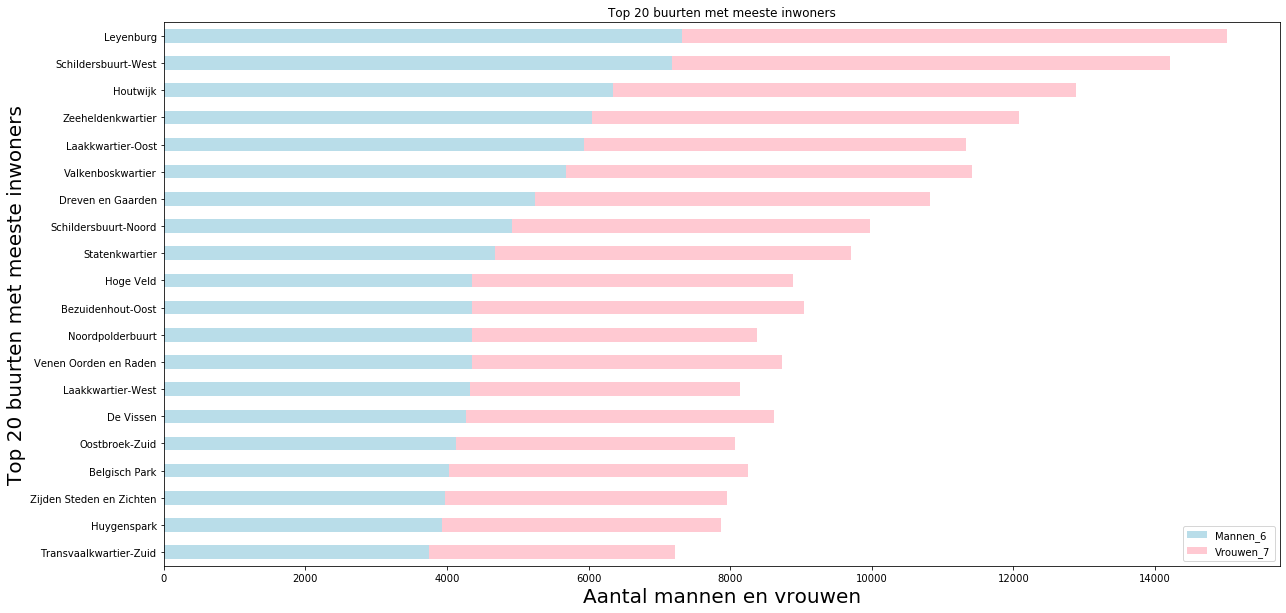

In [87]:
import matplotlib.pyplot as plt

Barchart = DenHaag_merged.drop(columns=[
    "WijkenEnBuurten", "AantalInwoners_5", "Gemeentenaam_1","SoortRegio_2","Codering_3","k_15Tot25Jaar_9","k_25Tot45Jaar_10","k_45Tot65Jaar_11","k_65JaarOfOuder_12","OppervlakteTotaal_100","MeestVoorkomendePostcode_103",
    "k_15Tot25Jaar_9","k_25Tot45Jaar_10","k_45Tot65Jaar_11","k_65JaarOfOuder_12","GIHandelEnHoreca_84","OppervlakteTotaal_100","MeestVoorkomendePostcode_103",
    "GIHandelEnHoreca_84", "Lattitude","Longitude"
 ])
Barchart.set_index('Naam', inplace=True)
Barchart.sort_values(["Mannen_6"], ascending=True, axis=0, inplace=True)
Barchart2 = Barchart.tail(20)
Mannen = Barchart2["Mannen_6"]
Vrouwen = Barchart2["Vrouwen_7"]
ax = Barchart2.plot(kind='barh', color = ["lightblue","pink"], alpha=0.85,stacked=True, figsize=(20, 10))
ax.set_title('Top 20 buurten met meeste inwoners')
ax.set_xlabel('Aantal mannen en vrouwen', fontsize = 20)
ax.set_ylabel('Top 20 buurten met meeste inwoners', fontsize = 20)


Text(0.5, 1.0, 'aantal inwoners tegenover oppervlakte')

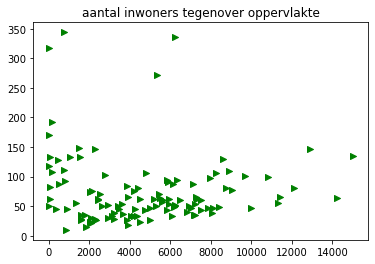

In [322]:
df3 = df.drop(columns=["Unnamed: 0","OppervlakteLand_101", "OppervlakteWater_102", "Dekkingspercentage_104", "MateVanStedelijkheid_105", "Omgevingsadressendichtheid_106", "ALandbouwBosbouwEnVisserij_82","BFNijverheidEnEnergie_83","HJVervoerInformatieEnCommunicatie_85","KLFinancieleDienstenOnroerendGoed_86","MNZakelijkeDienstverlening_87","RUCultuurRecreatieOverigeDiensten_88","PersonenautoSTotaal_89",
                "PersonenPerSoortUitkeringAO_75","PersonenPerSoortUitkeringWW_76","PersonenPerSoortUitkeringAOW_77","TotaalDiefstalUitWoningSchuurED_78","VernielingMisdrijfTegenOpenbareOrde_79","GeweldsEnSeksueleMisdrijven_80",
                 "IndelingswijzigingWijkenEnBuurten_4","PercentageWoningenMetStadsverwarming_63","AantalInkomensontvangers_64","k_40PersonenMetLaagsteInkomen_67","k_20PersonenMetHoogsteInkomen_68","BedrijfsvestigingenTotaal_81",
                 "Actieven1575Jaar_69","k_40HuishoudensMetLaagsteInkomen_70","k_20HuishoudensMetHoogsteInkomen_71","HuishoudensMetEenLaagInkomen_72","HuishOnderOfRondSociaalMinimum_73","PersonenPerSoortUitkeringBijstand_74",
                 "Hoekwoning_58","TweeOnderEenKapWoning_59","VrijstaandeWoning_60","Huurwoning_61","EigenWoning_62",
                 "Huurwoning_53","EigenWoning_54","GemiddeldAardgasverbruikTotaal_55","Appartement_56","Tussenwoning_57",
                 "Appartement_48","Tussenwoning_49","Hoekwoning_50","TweeOnderEenKapWoning_51","VrijstaandeWoning_52",
                 "PercentageBewoond_38","PercentageOnbewoond_39","Koopwoningen_40","HuurwoningenTotaal_41","InBezitWoningcorporatie_42",
                 "InBezitOverigeVerhuurders_43","EigendomOnbekend_44","BouwjaarVoor2000_45","BouwjaarVanaf2000_46","GemiddeldElektriciteitsverbruikTotaal_47",
                 "Bevolkingsdichtheid_33","Woningvoorraad_34","GemiddeldeWoningwaarde_35","PercentageEengezinswoning_36","PercentageMeergezinswoning_37",
                 "HuishoudensTotaal_28","Eenpersoonshuishoudens_29","HuishoudensZonderKinderen_30","HuishoudensMetKinderen_31",
                 "GemiddeldeHuishoudensgrootte_32","GemiddeldInkomenPerInkomensontvanger_65","GemiddeldInkomenPerInwoner_66",      
                 "GeboorteTotaal_24","GeboorteRelatief_25","SterfteTotaal_26","SterfteRelatief_27","Ongehuwd_13","Gehuwd_14","Gescheiden_15","k_0Tot15Jaar_8",
                 "NederlandseAntillenEnAruba_20","Suriname_21","Turkije_22","OverigNietWesters_23","Verweduwd_16","WestersTotaal_17","NietWestersTotaal_18","Marokko_19",
                 "PersonenautoSPerHuishouden_92", "Motorfietsen_94","AfstandTotHuisartsenpraktijk_95","AfstandTotGroteSupermarkt_96","AfstandTotKinderdagverblijf_97","AfstandTotSchool_98","ScholenBinnen3Km_99","PersonenautoSBrandstofBenzine_90","PersonenautoSOverigeBrandstof_91","PersonenautoSNaarOppervlakte_93","OppervlakteWater_102","Dekkingspercentage_104","MateVanStedelijkheid_105","Omgevingsadressendichtheid_106",
           "Gemeentenaam_1","SoortRegio_2","Codering_3","Mannen_6","Vrouwen_7","GIHandelEnHoreca_84","MeestVoorkomendePostcode_103"])

# using apply function to create a new column 

df3 = pd.merge(df3, coo, on='WijkenEnBuurten')
df3.set_index('Naam')
df3.sort_values("AantalInwoners_5",inplace=True)
df4 = df3.tail(20)

df3['mensen per oppervlakte'] = df3.apply(lambda row: row.AantalInwoners_5 /
                                  row.OppervlakteTotaal_100, axis = 1) 
df3

plt.scatter(df3['AantalInwoners_5'], df3['OppervlakteTotaal_100'],color='green', marker=">")
plt.title('aantal inwoners tegenover oppervlakte')


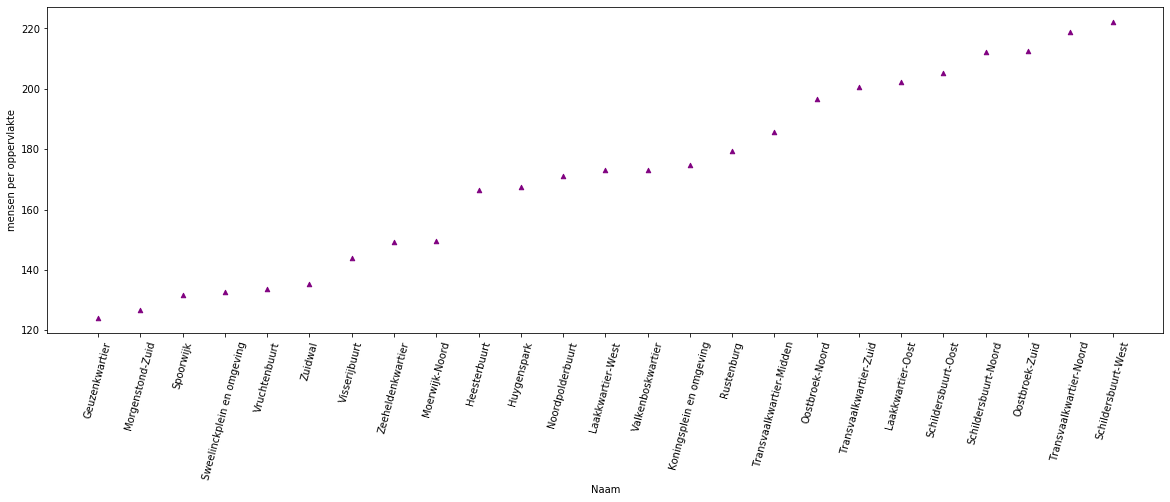

In [331]:
df3.sort_values('mensen per oppervlakte',inplace=True)
df5 = df3.tail(25)

df5.plot(kind='scatter', x='Naam', y='mensen per oppervlakte', rot=75, figsize=(20, 6), color='purple', marker = "^")